### The classic imports and Keras import

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import Input

Using TensorFlow backend.


## Function to load & preprocess data

In [24]:
import os
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

ROOT_DIR = os.path.dirname(os.getcwd())

def load_mnist(size='100', test_size=0.2, dir_path='/Users/jonny/Desktop/PycharmProjects/ML-algorithms/Projects/Kamangar_NeuralNet/Tran_assignment_06'):
    path = ''
    if size == '100':
        path = dir_path + '/set3_100/'
    elif size == '2000':
        path = dir_path + '/set2_2k/'
    elif size == '20000':
        path = dir_path + '/train/'

    files_list = os.listdir(path)
    n_samples = len(files_list)
    X = np.ndarray((n_samples, 784))
    y = np.ndarray((n_samples, ))

    for i in range(n_samples):
        X[i] = np.asarray(misc.imread(path + files_list[i])).ravel()
        y[i] = int(files_list[i].split('_')[0])

    X = preprocessing.normalize(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=np.random.randint(0, 10000))

    return X_train, X_test, Y_train, Y_test

### Model Hyper-parameters

In [14]:
n_hidden = 100
input_size = x_train.shape[1]

## Define neural network structure

In [16]:
# Structure inspired from Francious Chollet's blog
input_img = Input(shape=(input_size,))
encoder = Dense(n_hidden, activation='relu')(input_img)
decoder = Dense(input_size, activation='linear')(encoder)

# The model to train encoder & decoder layers for reconstruction
autoencoder = Model(input=input_img, output=decoder)

In [19]:
autoencoder.summary()
autoencoder.compile(optimizer='rmsprop', loss='mse')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 100)           78500       input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 784)           79184       dense_1[0][0]                    
Total params: 157684
____________________________________________________________________________________________________


# Task 1 Report


### Training hyper parameters

In [35]:
batch_size = 256
nb_epoch = 50

## Train the model

In [36]:
x_train, _, x_test, _ = load_mnist(size='20000', test_size=0.)
train_20000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)
x_train, _, x_test, _ = load_mnist(size='2000', test_size=0.)
train_2000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)

### Graphing the loss

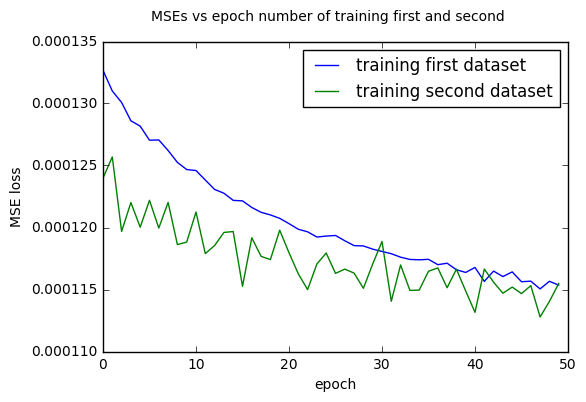

In [37]:
train_20000_handle, = plt.plot(train_20000.history['loss'], label='first dataset')
train_2000_handle, = plt.plot(train_2000.history['loss'], label='second dataset')
plt.legend(handles=[train_20000_handle, train_2000_handle])
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.suptitle("MSEs vs epoch number of training first and second")

# Task 2

### Setting up network structure for 20, 40, 60, 80, and 100 hidden nodes

In [38]:
n_hidden_s = [20, 40, 60, 80, 100]
batch_size = 256
nb_epoch = 50

autoencoder_s = []

for n_hidden in n_hidden_s:
    input_img = Input(shape=(input_size,))
    encoder = Dense(n_hidden, activation='relu')(input_img)
    decoder = Dense(input_size, activation='linear')(encoder)

    # The model to train encoder & decoder layers for reconstruction
    autoencoder = Model(input=input_img, output=decoder)
    autoencoder_s.append(autoencoder)

for autoencoder in autoencoder_s:
    autoencoder.compile(optimizer='rmsprop', loss='mse')

### Train the 5 models separately for each datasets

In [40]:
x_train, _, x_test, _ = load_mnist(size='20000', test_size=0.)

loss_20000 = []
for autoencoder, n_hidden in zip(autoencoder_s, n_hidden_s):
    train_20000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)
    loss_20000.append(train_20000.history['loss'][-1])


x_train, _, x_test, _ = load_mnist(size='2000', test_size=0.)
loss_2000 = []
for autoencoder, n_hidden in zip(autoencoder_s, n_hidden_s):
    train_2000 = autoencoder.fit(x_train, x_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    shuffle=True,
                    verbose=0)
    loss_2000.append(train_2000.history['loss'][-1])

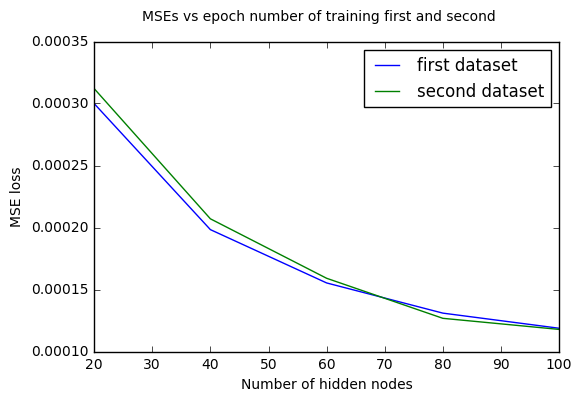

In [41]:
# Setting up plot
train_20000_handle, = plt.plot(n_hidden_s, loss_20000, label='first dataset')
train_2000_handle, = plt.plot(n_hidden_s, loss_2000, label='second dataset')
plt.legend(handles=[train_20000_handle, train_2000_handle])
plt.xlabel('Number of hidden nodes')
plt.ylabel('MSE loss')
plt.suptitle("MSEs vs n_hidden of training first and second datasets")

# Task 3

### Setting up network structure & hyper-parameters

In [80]:
n_hidden = 100
batch_size = 256
nb_epoch = 100


input_img = Input(shape=(input_size,))
encoder = Dense(n_hidden, activation='relu')(input_img)
decoder = Dense(input_size, activation='linear')(encoder)

# The model to train encoder & decoder layers for reconstruction
autoencoder = Model(input=input_img, output=decoder)

autoencoder.compile(optimizer='rmsprop', loss='mse')

### Train the model

In [81]:
x_train, _, x_test, _ = load_mnist(size='20000', test_size=0.)

task3 = autoencoder.fit(x_train, x_train,
                batch_size=batch_size, nb_epoch=nb_epoch,
                shuffle=True,
                verbose=0)

In [82]:
layer1_weights = autoencoder.layers[1].get_weights()[0]
print layer1_weights.shape
layer2_weights = autoencoder.layers[2].get_weights()[0]
print layer2_weights.shape

(784, 100)
(100, 784)


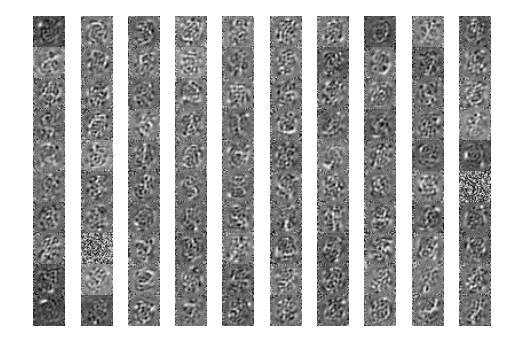

In [83]:
def plot_gallery(title, images, h, w, channel=1, n_row=10, n_col=10):
    # plt.figure(figsize=(1.5 * n_col, 1.5 * n_row))
    plt.title(title)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((w, h)), 'gray')
        plt.subplots_adjust(hspace=0.001)
        plt.axis('off')
        
plot_gallery("Visualizing Learned Weights", layer1_weights.T, 28, 28, n_row=10, n_col=10)

# Task 4

### Set up the 100 test data

In [84]:
x_train, _, x_test, _ = load_mnist(size='100', test_size=0.)

### Displaying original input

In [ ]:
plot_gallery("Displaying original input", x_train, 28, 28, n_row=10, n_col=10)

### Displaying reconstructured output

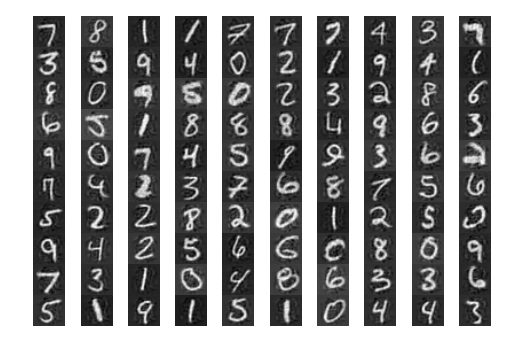

In [79]:
layer1_weights = autoencoder.layers[1].get_weights()[0]
layer2_weights = autoencoder.layers[2].get_weights()[0]
reconstructed_outputs = np.dot(np.dot(x_train, layer1_weights), layer2_weights)
plot_gallery("Displaying reconstructured outputs", reconstructed_outputs, 28, 28, n_row=10, n_col=10)